# IBM Introduction to Machine Learning
## Supervised Learning: Classification
### Course Project

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install python-graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from io import StringIO
from IPython.display import Image
import pydotplus

In [5]:
data = pd.read_csv('churndata_processed.csv')
data.T

0         1         2         3         4     \
months                     0.000000  0.000000  0.250000  0.250000  0.500000   
multiple                   0.000000  1.000000  1.000000  0.000000  1.000000   
gb_mon                     0.094118  0.200000  0.611765  0.141176  0.164706   
security                   0.000000  0.000000  0.000000  0.000000  0.000000   
backup                     0.000000  1.000000  0.000000  1.000000  0.000000   
protection                 1.000000  0.000000  0.000000  1.000000  0.000000   
support                    0.000000  0.000000  0.000000  0.000000  0.000000   
unlimited                  0.000000  1.000000  1.000000  1.000000  1.000000   
contract                   0.000000  0.000000  0.000000  0.000000  0.000000   
paperless                  1.000000  1.000000  1.000000  1.000000  1.000000   
monthly                    0.212935  0.620896  0.768159  0.798507  0.579602   
satisfaction               0.500000  0.500000  0.250000  0.250000  0.250000   
churn_value                1.000000  1.000000  1.000000  1.000000  1.000000   
payment_Credit Card        0.000000  1.000000  0.000000  0.000000  0.000000   
payment_Mailed Check       0.000000  0.000000  0.000000  0.000000  0.000000   
internet_type_DSL          1.000000  0.000000  0.000000  0.000000  0.000000   
internet_type_Fiber Optic  0.000000  1.000000  1.000000  1.000000  1.000000   
internet_type_None         0.000000  0.000000  0.000000  0.000000  0.000000   
offer_Offer A              0.000000  0.000000  0.000000  0.000000  0.000000   
offer_Offer B              0.000000  0.000000  0.000000  0.000000  0.000000   
offer_Offer C              0.000000  0.000000  0.000000  1.000000  1.000000   
offer_Offer D              0.000000  0.000000  1.000000  0.000000  0.000000   
offer_Offer E              0.000000  1.000000  0.000000  0.000000  0.000000   

                               5         6         7         8         9     \
months                     0.250000  0.000000  1.000000  0.000000  0.000000   
multiple                   1.000000  0.000000  0.000000  1.000000  0.000000   
gb_mon                     0.211765  0.352941  0.282353  0.223529  0.211765   
security                   0.000000  0.000000  0.000000  0.000000  1.000000   
backup                     0.000000  0.000000  1.000000  0.000000  0.000000   
protection                 1.000000  0.000000  1.000000  0.000000  0.000000   
support                    0.000000  0.000000  0.000000  0.000000  0.000000   
unlimited                  0.000000  1.000000  1.000000  1.000000  0.000000   
contract                   0.000000  0.000000  0.000000  0.000000  0.000000   
paperless                  1.000000  1.000000  1.000000  1.000000  0.000000   
monthly                    0.595025  0.519403  0.269154  0.559204  0.579104   
satisfaction               0.000000  0.250000  0.000000  0.250000  0.250000   
churn_value                1.000000  1.000000  1.000000  1.000000  1.000000   
payment_Credit Card        0.000000  0.000000  0.000000  0.000000  0.000000   
payment_Mailed Check       0.000000  1.000000  0.000000  1.000000  0.000000   
internet_type_DSL          0.000000  0.000000  1.000000  0.000000  0.000000   
internet_type_Fiber Optic  1.000000  1.000000  0.000000  1.000000  1.000000   
internet_type_None         0.000000  0.000000  0.000000  0.000000  0.000000   
offer_Offer A              0.000000  0.000000  0.000000  0.000000  0.000000   
offer_Offer B              0.000000  0.000000  1.000000  0.000000  0.000000   
offer_Offer C              1.000000  0.000000  0.000000  0.000000  0.000000   
offer_Offer D              0.000000  0.000000  0.000000  1.000000  0.000000   
offer_Offer E              0.000000  1.000000  0.000000  0.000000  1.000000   

                           ...      7033     7034      7035      7036  \
months                     ...  1.000000  0.00000  0.500000  0.250000   
multiple                   ...  0.000000  0.00000  0.000000  0.000000   
gb_mon            

In [6]:
data.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

<AxesSubplot:>

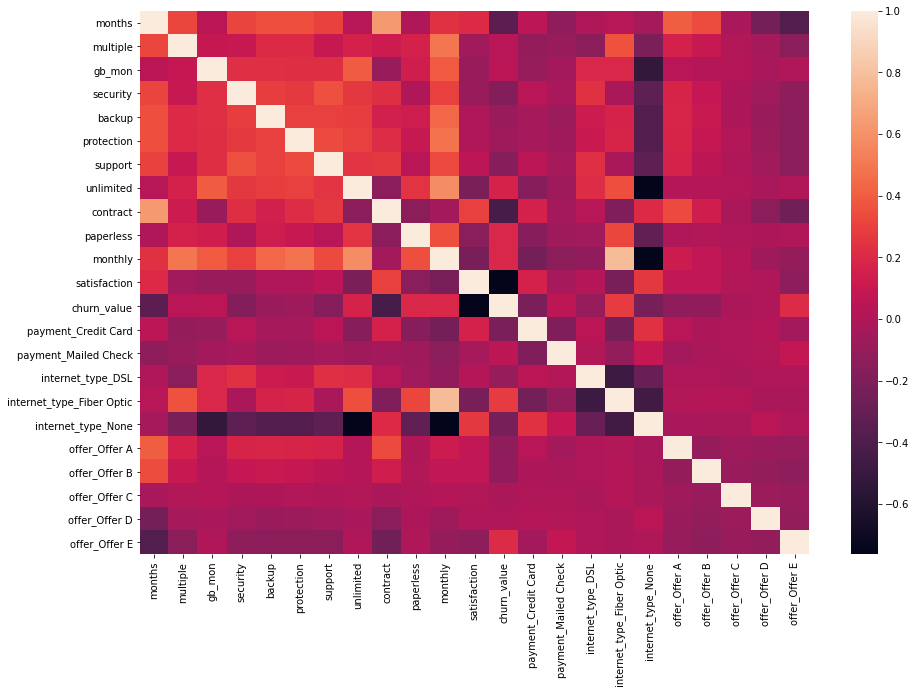

In [7]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data.corr())

In [8]:
target = 'churn_value'
print(data[target].value_counts())
print(data[target].value_counts(normalize=True))

0    5174
1    1869
Name: churn_value, dtype: int64
0    0.73463
1    0.26537
Name: churn_value, dtype: float64


### StratifiedShuffleSplit

In [9]:
feature_cols = [x for x in data.columns if x != target]

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data[target]))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, target]

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, target]

In [10]:
print("y_train:", y_train.value_counts(normalize=True), sep ='\n')
print("y_test:", y_test.value_counts(normalize=True), sep='\n')

y_train:
0    0.734686
1    0.265314
Name: churn_value, dtype: float64
y_test:
0    0.734501
1    0.265499
Name: churn_value, dtype: float64


## Logistic Regression

In [11]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [12]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

print("y_pred", y_pred.head(), sep = '\n')
print("y_prob", y_prob.head(), sep = '\n')

y_pred
   lr  l1  l2
0   1   1   1
1   0   0   0
2   1   1   1
3   0   0   0
4   0   0   0
y_prob
         lr        l1        l2
0  0.998689  1.000000  0.999997
1  0.998944  1.000000  0.999998
2  0.574648  0.614385  0.613905
3  0.986572  0.999753  0.999258
4  0.999134  0.999990  0.999969


In [13]:
metrics = list()
cm = dict()

for lab in coeff_labels:

    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    #auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
    #          label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
    #          average='weighted')
    
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              #'auc':auc
                             }, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

lr        l1        l2
precision  0.950684  0.952993  0.954013
recall     0.950308  0.953147  0.954094
fscore     0.949289  0.952503  0.953433
accuracy   0.950308  0.953147  0.954094

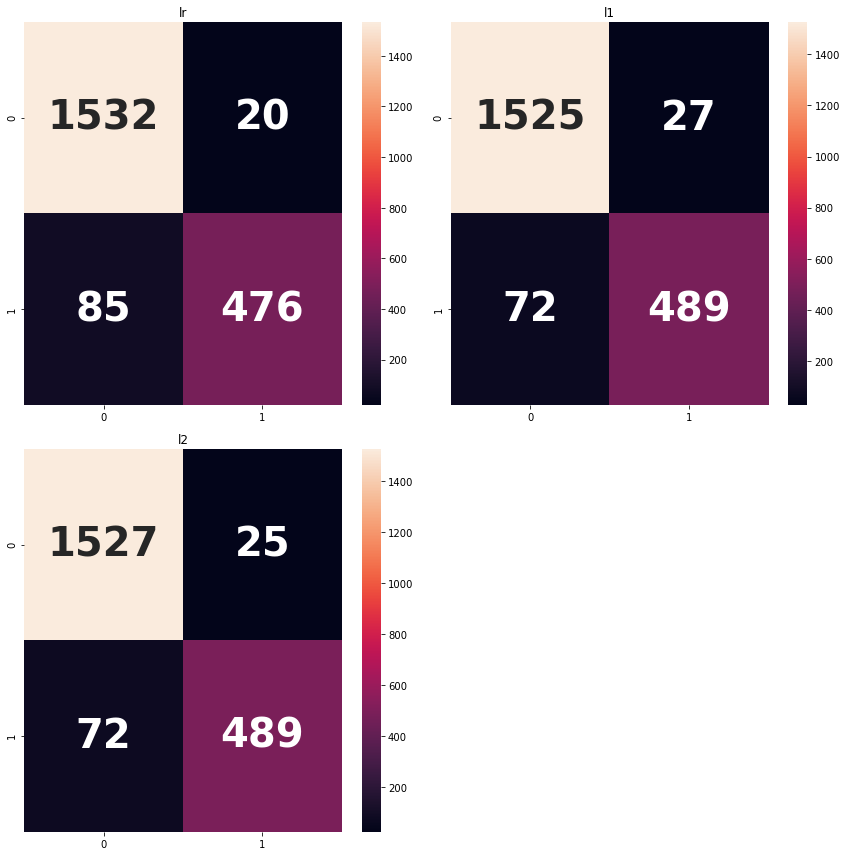

In [14]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 12)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=None, annot_kws={"size": 40, "weight": "bold"});
    ax.set(title=lab);
    
plt.tight_layout()

## K-Nearest Neighbor

In [15]:
max_k = 35
f1_scores = list()
error_rates = list()

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

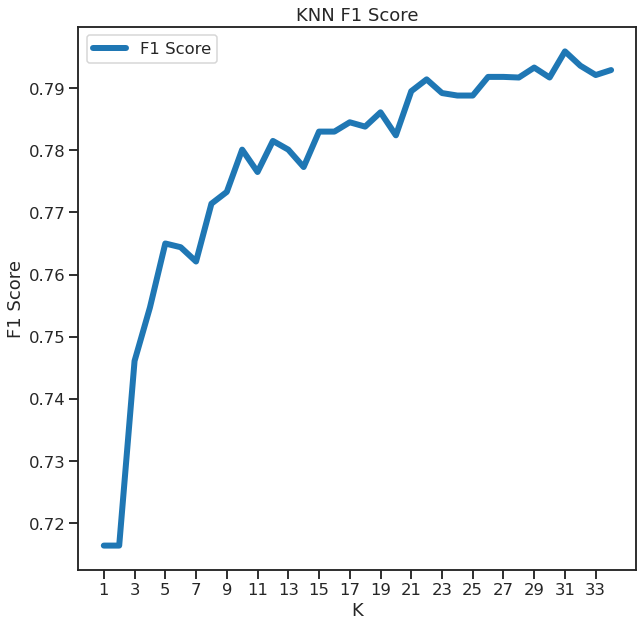

In [16]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(10, 10), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

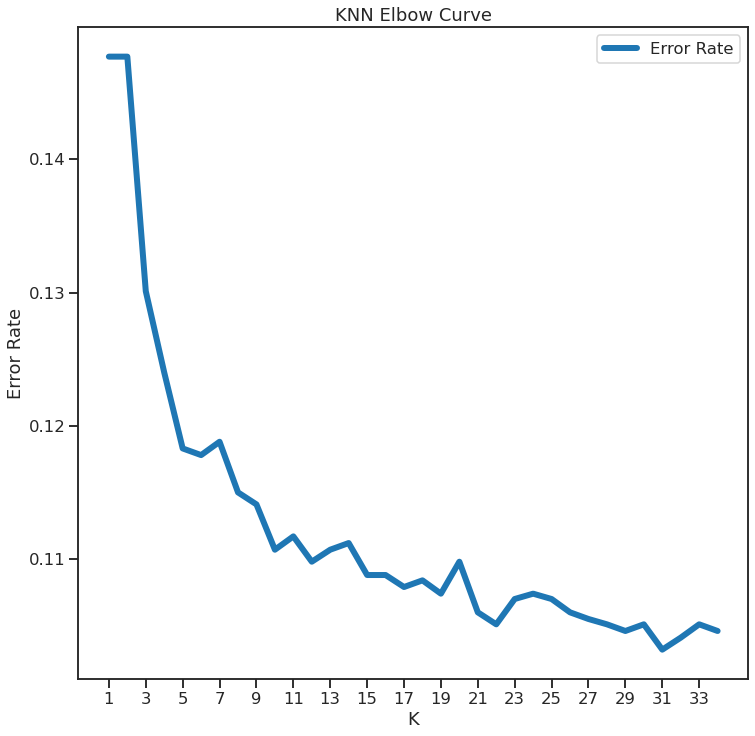

In [17]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

In [18]:
knn = KNeighborsClassifier(n_neighbors=31, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1552
           1       0.84      0.76      0.80       561

    accuracy                           0.90      2113
   macro avg       0.88      0.85      0.86      2113
weighted avg       0.89      0.90      0.90      2113

Accuracy score:  0.9
F1 Score:  0.8


Text(0.5, 58.5, 'Ground Truth')

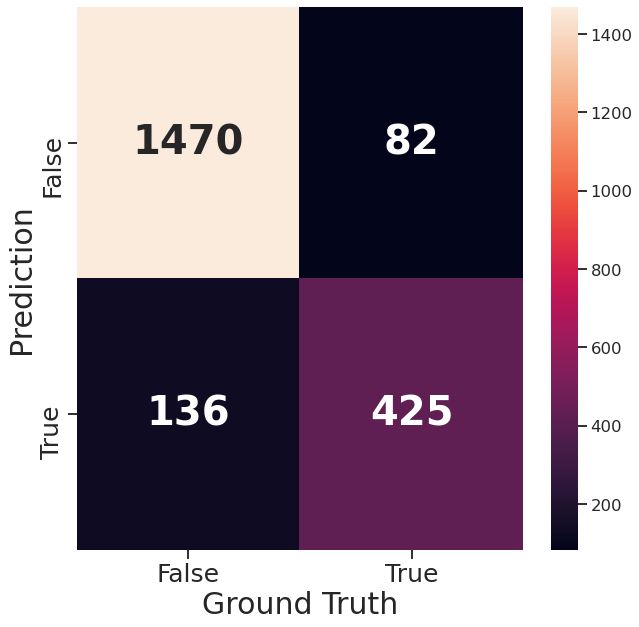

In [19]:
_, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);

ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

## Support Vector Machines

In [20]:
y = (data[target] == 0).astype(int)
fields = list(feature_cols)  # everything except "churn_value"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

internet_type_Fiber Optic   -0.279623
offer_Offer E               -0.214648
monthly                     -0.193356
paperless                   -0.191825
unlimited                   -0.166545
payment_Mailed Check        -0.056348
gb_mon                      -0.048868
multiple                    -0.040102
offer_Offer D               -0.001435
offer_Offer C                0.020660
protection                   0.066160
backup                       0.082255
internet_type_DSL            0.099716
offer_Offer B                0.117723
offer_Offer A                0.126654
support                      0.164674
security                     0.171226
payment_Credit Card          0.218528
internet_type_None           0.227890
months                       0.337205
contract                     0.435398
satisfaction                 0.754649
dtype: float64

In [21]:
#sns.set_context('talk')
#sns.set_style('white')
#sns.pairplot(data, hue=None)

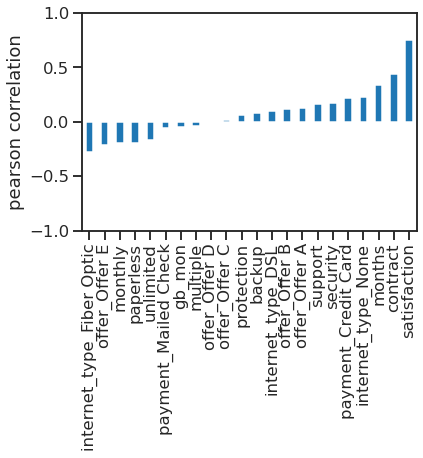

In [22]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [23]:
fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['contract', 'satisfaction'], dtype='object')
Index(['contract_scaled', 'satisfaction_scaled'], dtype='object')


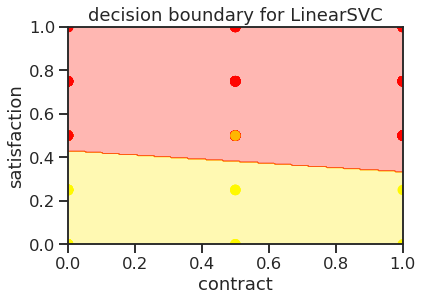

In [24]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

In [25]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

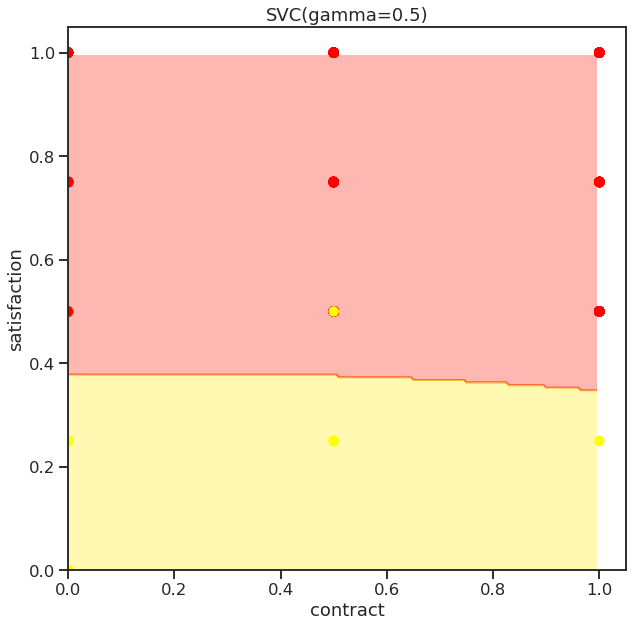

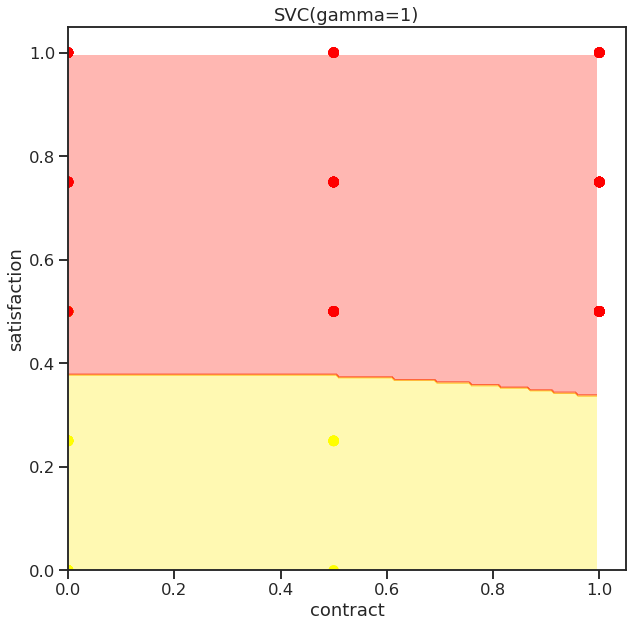

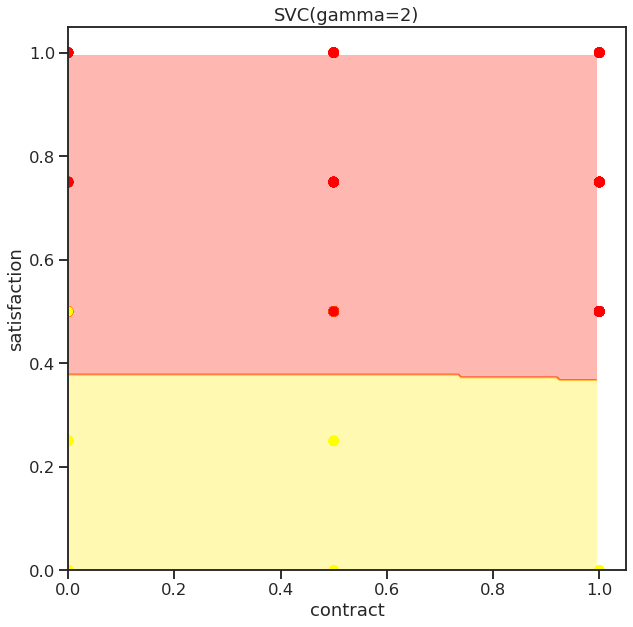

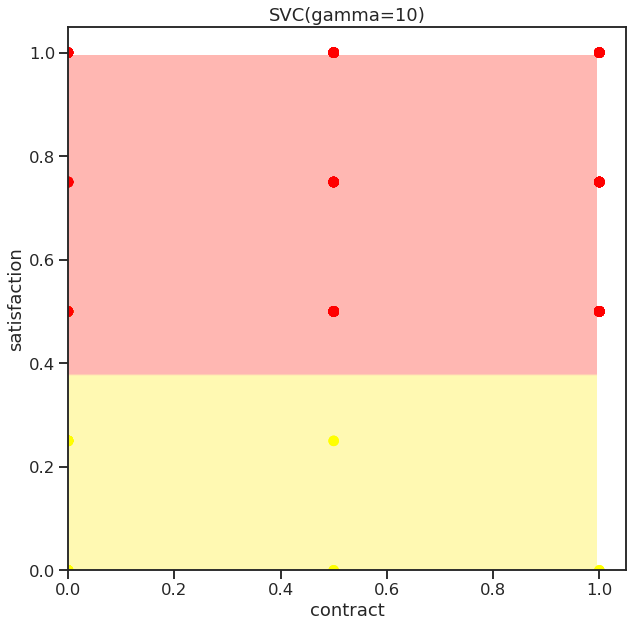

In [26]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

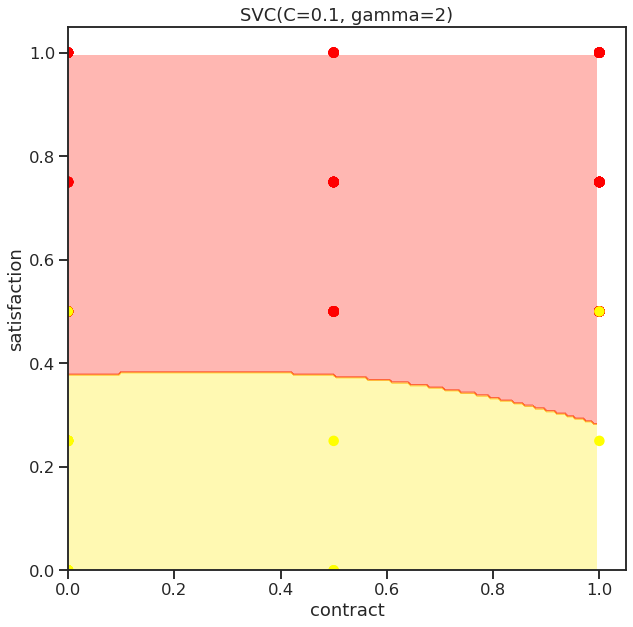

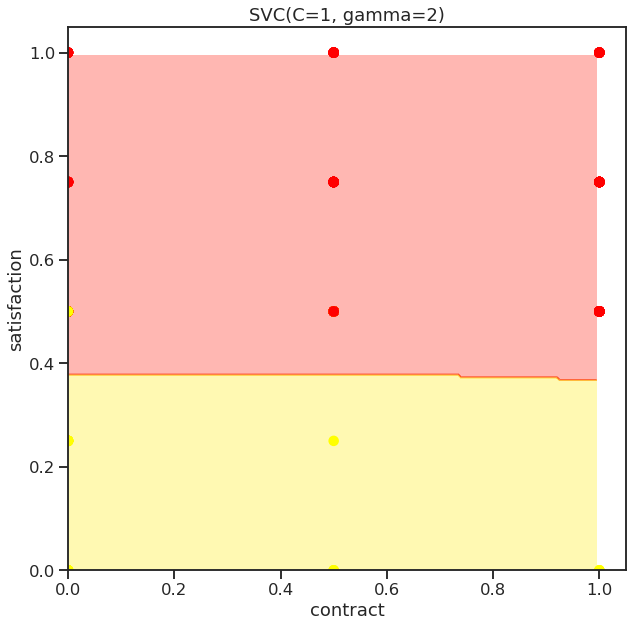

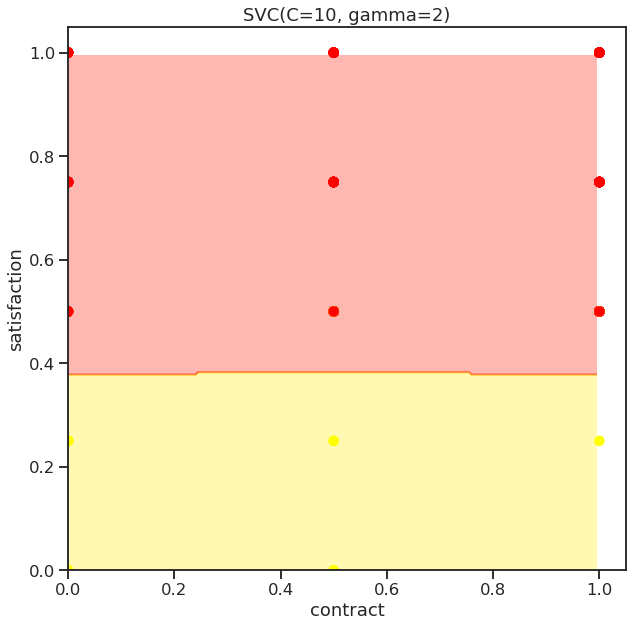

In [27]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

## Decision Trees

In [28]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [29]:
dt.tree_.node_count, dt.tree_.max_depth

(537, 20)

In [30]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [31]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy   0.999391  0.921439
precision  1.000000  0.845884
recall     0.997706  0.860963
f1         0.998852  0.853357

In [32]:
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [33]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(53, 7)

In [34]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)
train_test_gr_error

train      test
accuracy   0.958418  0.938476
precision  0.951679  0.920078
recall     0.888379  0.841355
f1         0.918940  0.878957

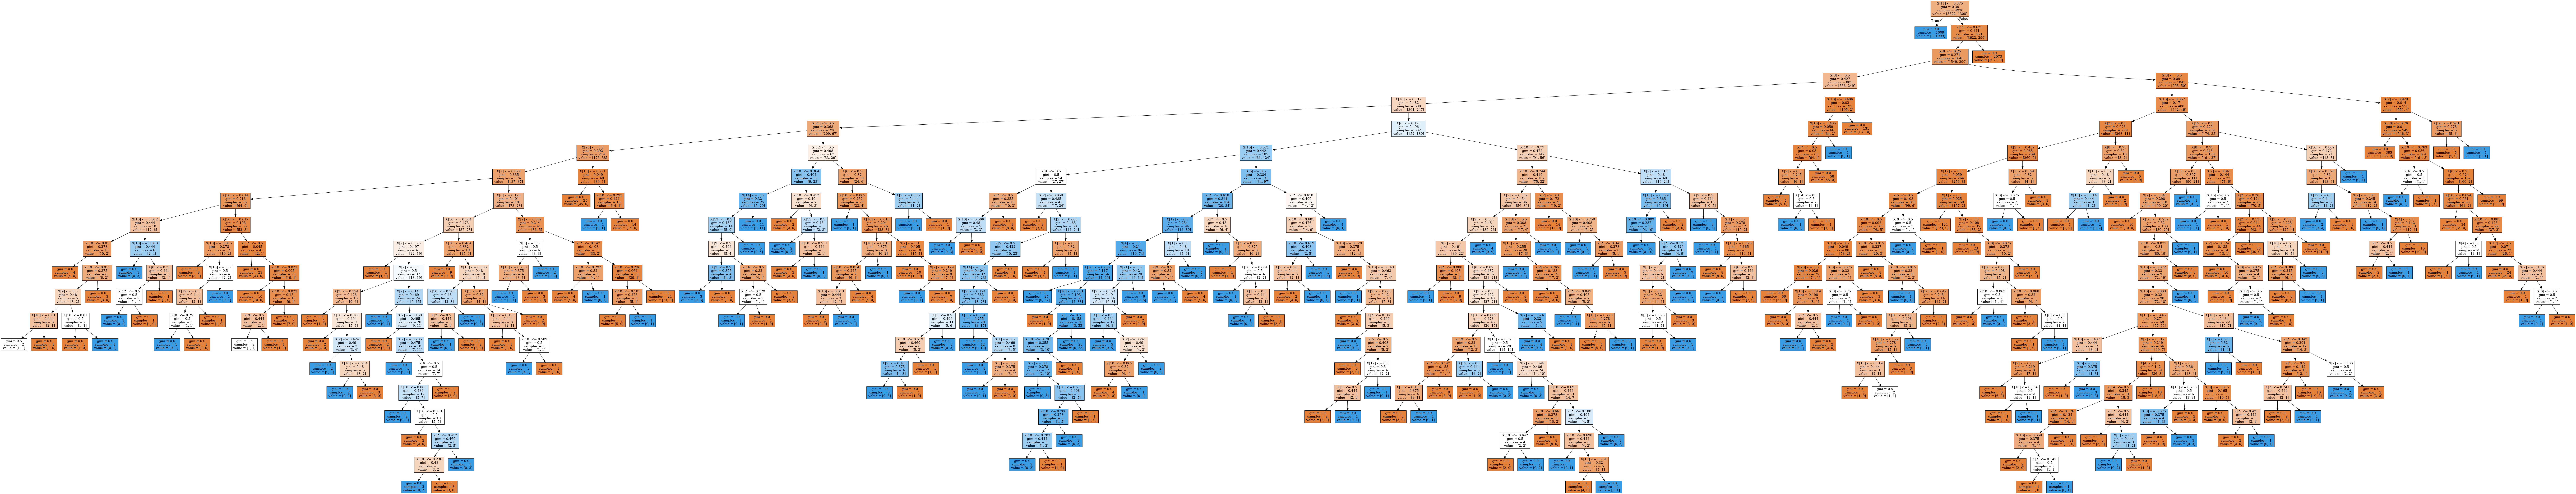

In [35]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
Image(filename=filename) 

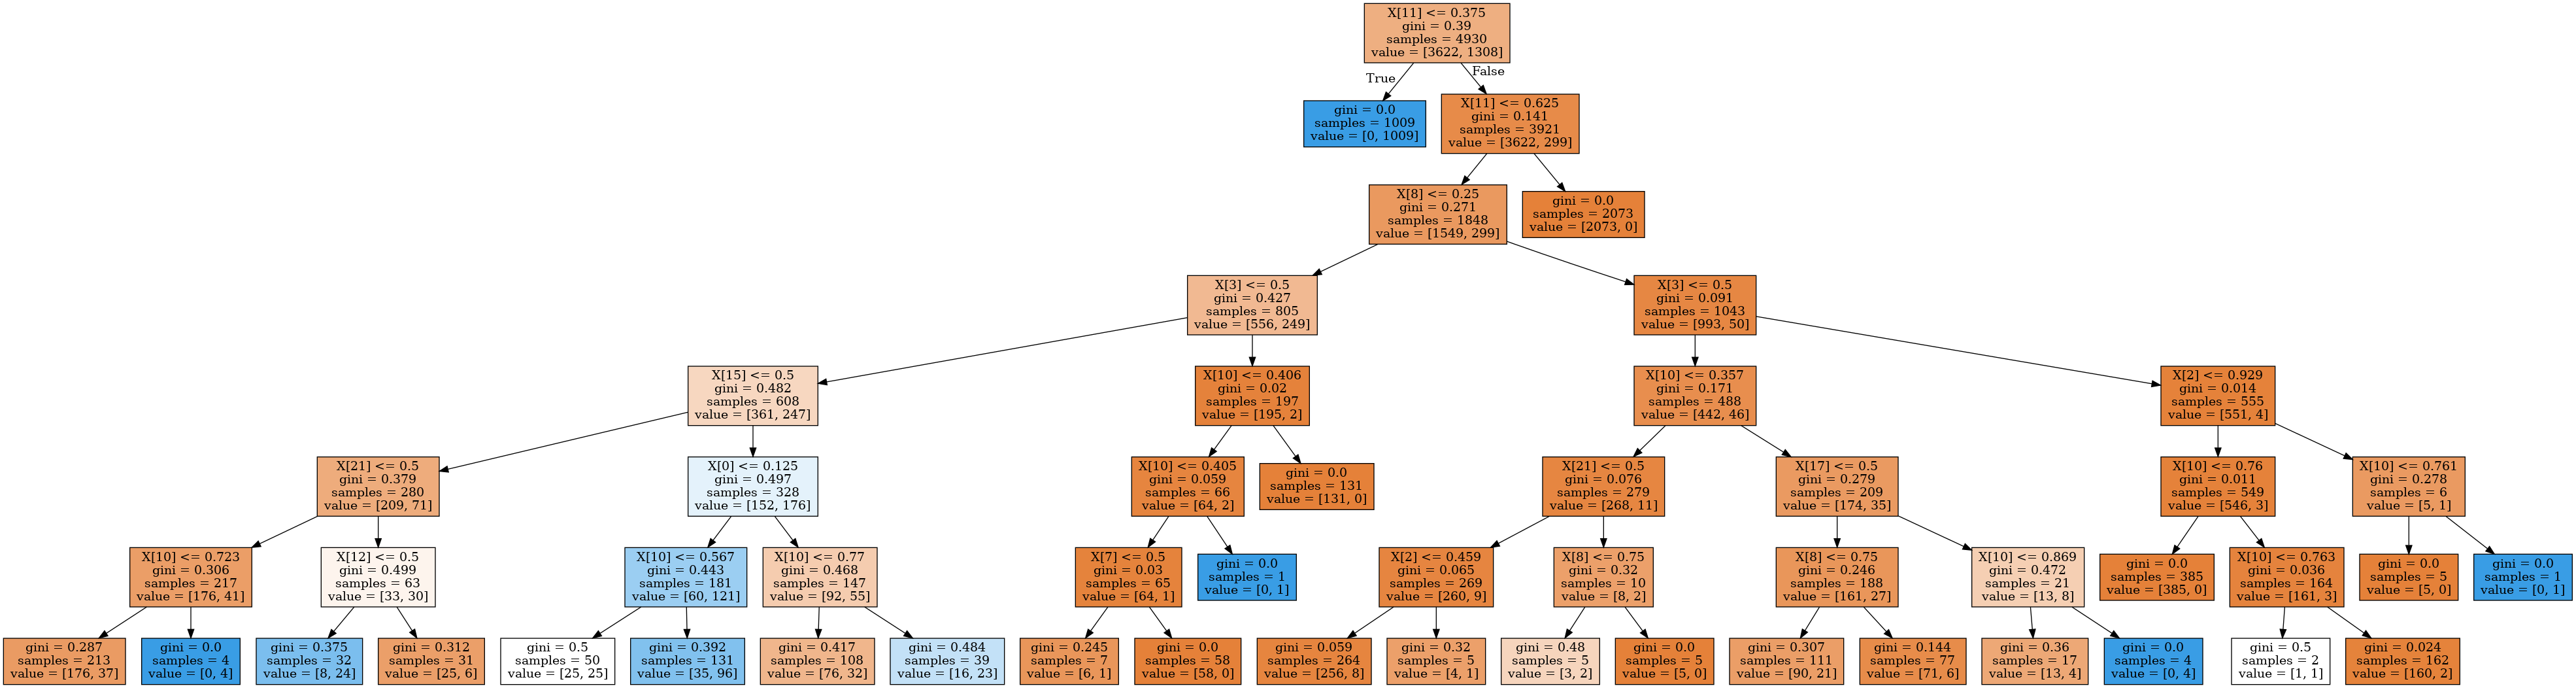

In [36]:
dot_data = StringIO()

export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

filename = 'wine_tree_prune.png'
graph.write_png(filename)
Image(filename=filename) 

## Random Forest

In [37]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    RF.set_params(n_estimators=n_trees)

    RF.fit(X_train, y_train)

    oob_error = 1 - RF.oob_score_
    
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

oob
n_trees          
15.0     0.056795
20.0     0.055984
30.0     0.053144
40.0     0.050913
50.0     0.049087
100.0    0.047667
150.0    0.049290
200.0    0.048073
300.0    0.048479
400.0    0.048479

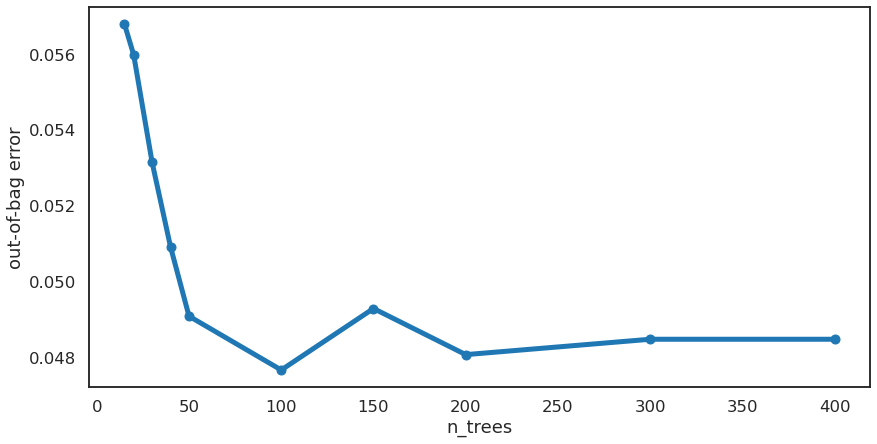

In [38]:
%matplotlib inline
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [39]:
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

oob
n_trees          
15.0     0.066126
20.0     0.065517
30.0     0.060041
40.0     0.056592
50.0     0.054970
100.0    0.050710
150.0    0.050913
200.0    0.049899
300.0    0.050507
400.0    0.049696

In [40]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

RandomForest  ExtraTrees
n_trees                          
15.0         0.056795    0.066126
20.0         0.055984    0.065517
30.0         0.053144    0.060041
40.0         0.050913    0.056592
50.0         0.049087    0.054970
100.0        0.047667    0.050710
150.0        0.049290    0.050913
200.0        0.048073    0.049899
300.0        0.048479    0.050507
400.0        0.048479    0.049696

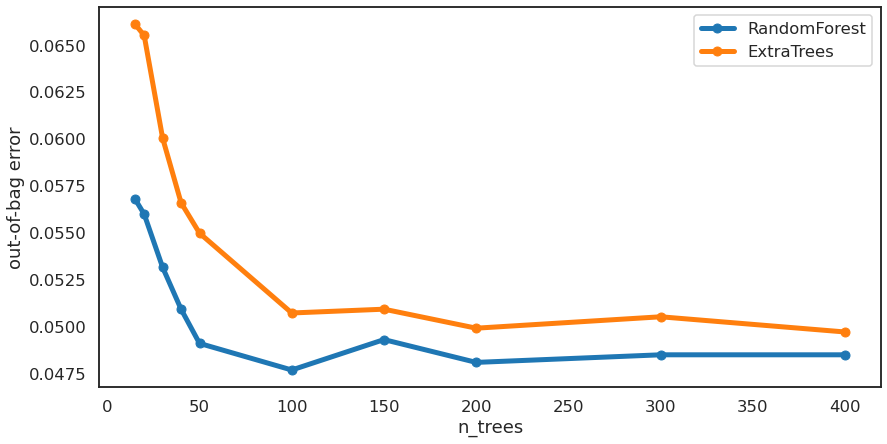

In [41]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [42]:
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [43]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1552
           1       0.94      0.85      0.89       561

    accuracy                           0.95      2113
   macro avg       0.94      0.91      0.93      2113
weighted avg       0.94      0.95      0.94      2113

   accuracy  precision    recall        f1       auc
0  0.945102   0.940594  0.846702  0.891182  0.913686


Text(0.5, 76.5, 'Ground Truth')

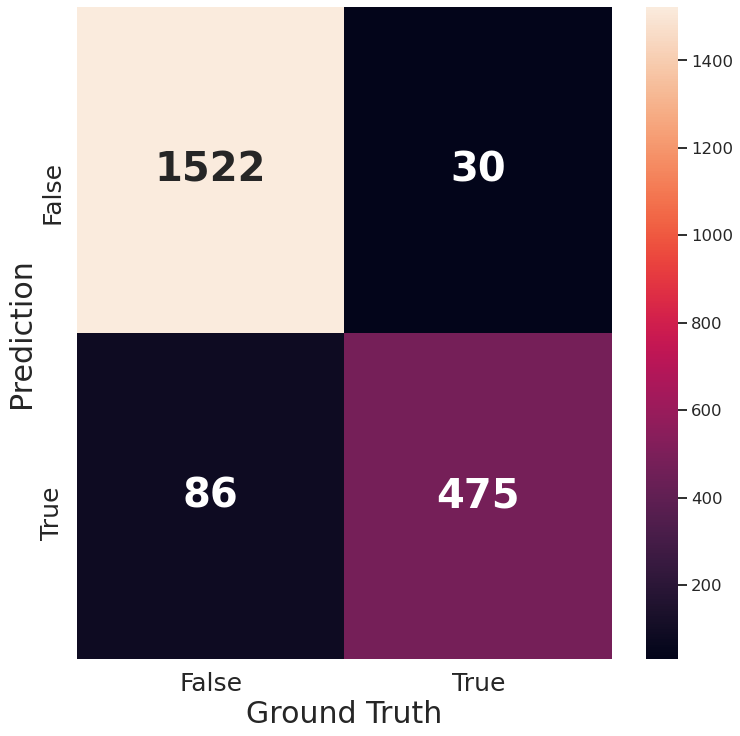

In [44]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=None, annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

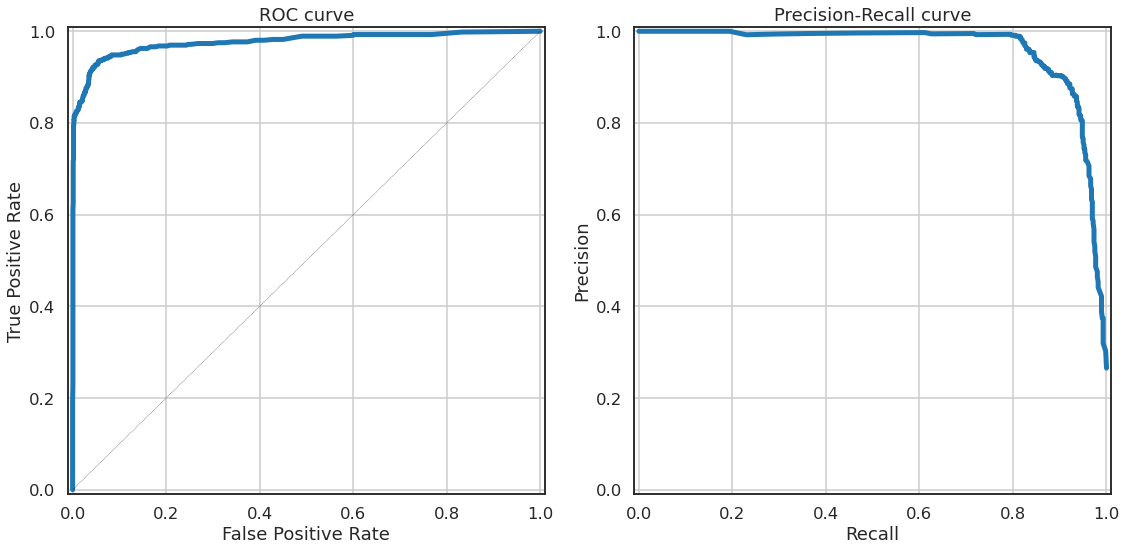

In [45]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

y_prob = model.predict_proba(X_test)

ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)

ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

In [ ]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');